In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500000)
pd.set_option('display.max_columns', 1000000)
pd.set_option('display.width', 100000)

In [134]:
ds = pd.read_csv('ml_data.csv')

In [135]:
ds.dtypes

Date         object
Open        float64
High        float64
Low         float64
Close       float64
Volume      float64
compound    float64
neg         float64
neu         float64
pos         float64
dtype: object

In [136]:
ds['Date'] = pd.to_datetime(ds['Date'])

In [327]:
ds.tail()

,Date,Close,Volume,compound,neg,neu,pos
14582,2019-12-05,131.910004,3595400.0,0.3983,0.057,0.813,0.130
14583,2019-12-06,133.220001,3437500.0,0.9939,0.055,0.607,0.338
14584,2019-12-09,133.919998,2968500.0,0.9955,0.000,0.620,0.380
14585,2019-12-10,133.910004,3480400.0,0.9183,0.000,0.791,0.209
14586,2019-12-11,133.759995,3953300.0,0.9508,0.037,0.706,0.257


# Checking distribution of target variable and sentiment


No handles with labels found to put in legend.


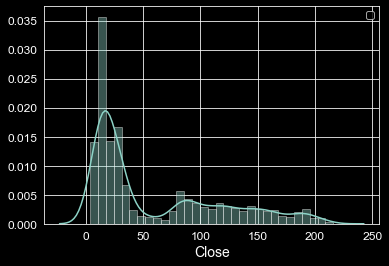

In [139]:
sns.distplot(ds['Close'])
plt.legend()
plt.show()

No handles with labels found to put in legend.


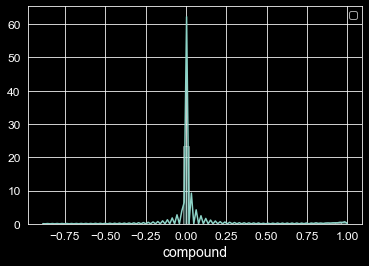

In [140]:
sns.distplot(ds['compound'])
plt.legend()
plt.show()

No handles with labels found to put in legend.


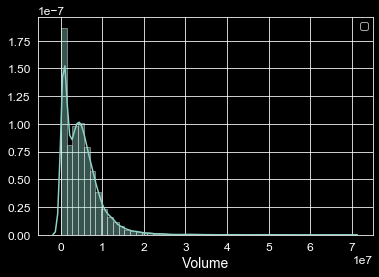

In [141]:
sns.distplot(ds['Volume'])
plt.legend()
plt.show()

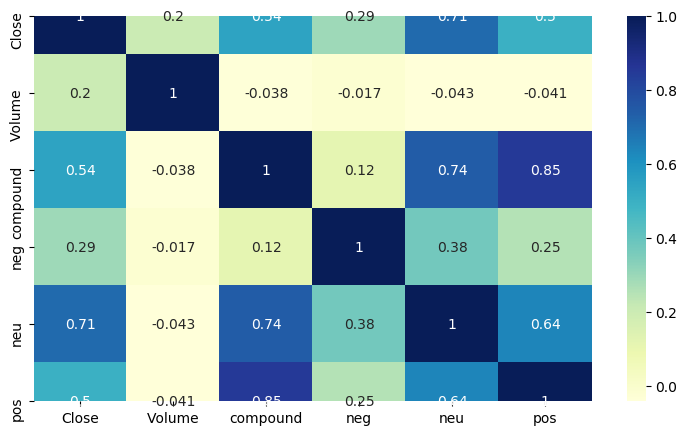

In [336]:
#checking for collinearity 
fig, ax = plt.subplots(figsize=(9,5)) 
ax = sns.heatmap(ds.corr(), annot=True, cmap="YlGnBu")

In [143]:
#dropping highly related variables
ds.drop(['Open', 'High', 'Low'], axis=1, inplace=True)

In [144]:
ds.tail()

,Date,Close,Volume,compound,neg,neu,pos
14582,2019-12-05,131.910004,3595400.0,0.3983,0.057,0.813,0.130
14583,2019-12-06,133.220001,3437500.0,0.9939,0.055,0.607,0.338
14584,2019-12-09,133.919998,2968500.0,0.9955,0.000,0.620,0.380
14585,2019-12-10,133.910004,3480400.0,0.9183,0.000,0.791,0.209
14586,2019-12-11,133.759995,3953300.0,0.9508,0.037,0.706,0.257


# Importing libraries and choosing models to be used

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

#evaluation 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# KNN (with sentiment)

In [374]:
ds1 = ds.drop(['Date'], axis=1)

In [375]:
y = ds1['Close']
X = ds1.drop('Close', axis = 1)

In [376]:
scaler = StandardScaler()
# Scales to standardized value
X_std = scaler.fit_transform(X)

In [377]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state = 31)

In [378]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11669, 5) (2918, 5) (11669,) (2918,)


In [379]:
knnr = KNeighborsRegressor(n_neighbors = 3)
model = knnr.fit(X_train, y_train)  #fit the model
y_pred = knnr.predict(X_test)

In [380]:
acc = knnr.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [381]:
print(f"Model accuracy {round(acc, 1)*100}%")
print(f"Mean square error {round(mse, 3)}")
print(f"Mean absolute error {round(mae, 3)}")
#print(f"r2 score {round(r2, 5)}")

Model accuracy 60.0%
Mean square error 1421.039
Mean absolute error 25.214


Very low accuracy - model does not suit needs

# Arima

In [222]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'

In [223]:
%matplotlib inline

In [224]:
ds4 = ds[['Date', 'Close']]
ds4 = ds.set_index('Date')

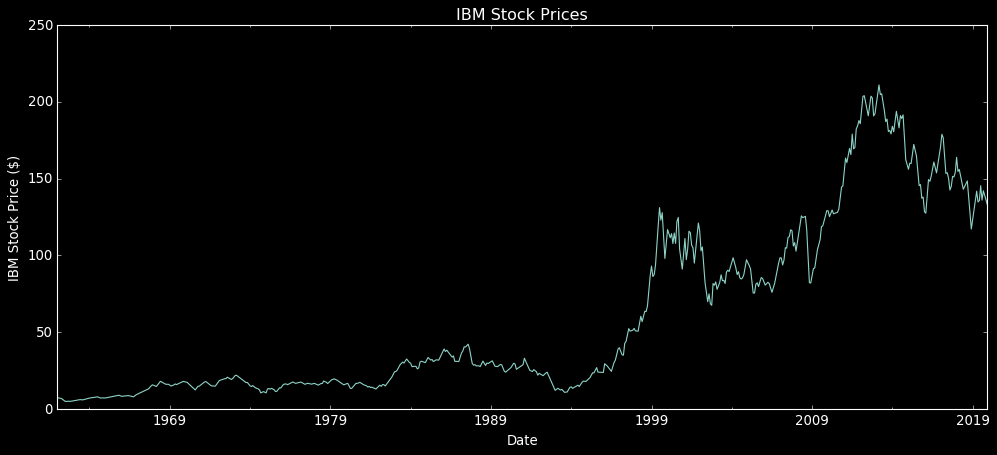

In [314]:
plt.title('IBM Stock Prices')
plt.xlabel('Date')
plt.ylabel('IBM Stock Price ($)')

ds4['Close'].resample('M').mean().plot(figsize=(15, 6))

plt.savefig('stock_prices_IBM.jpg', bbox_inches = 'tight', transparent = True)
plt.show()

In [58]:
# filtering dataset for a period where stock are decreasing
ds7 = ds[(ds['Date'] > '2015-08-31') & (ds['Date'] < '2016-02-17')]

In [59]:
ds7 = ds7.set_index('Date')

In [60]:
ds7.head()

,Close,Volume,compound,neg,neu,pos
Date,,,,,,
2015-09-01,142.679993,5272000.0,0.8295,0.0,0.862,0.138
2015-09-02,145.050003,4252000.0,0.9814,0.0,0.784,0.216
2015-09-03,146.779999,3603500.0,0.8426,0.0,0.878,0.122
2015-09-04,143.699997,4201100.0,0.8105,0.0,0.895,0.105
2015-09-08,147.229996,3933300.0,0.8472,0.0,0.739,0.261


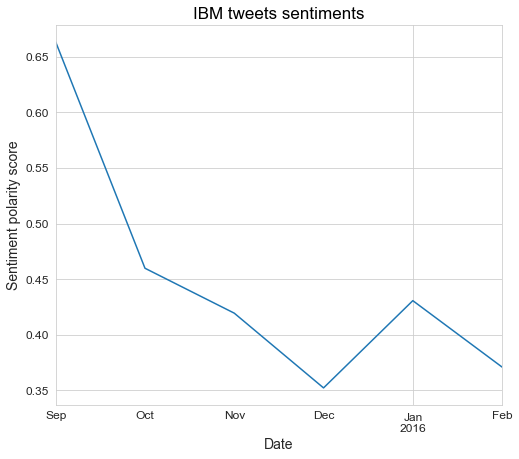

In [70]:
# Plotting sentiment over time

plt.title('IBM tweets sentiments', fontsize=17)
plt.xlabel('Date')
plt.ylabel('Sentiment polarity score')

ds7['compound'].resample('M').mean().plot(figsize=(8, 7))

plt.savefig('IBM_sentiment_tweets_period.jpg', bbox_inches = 'tight', transparent = True)
plt.show()

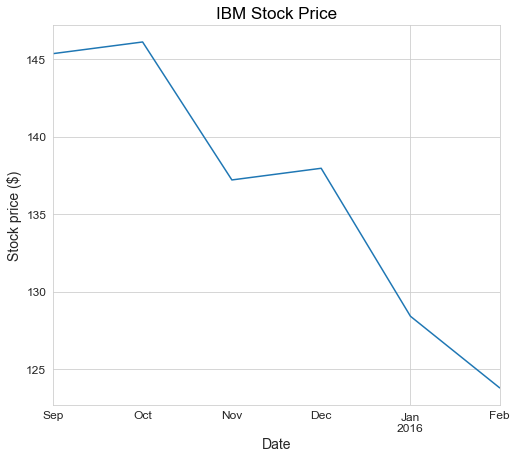

In [71]:
plt.title('IBM Stock Price', fontsize= 17)
plt.xlabel('Date')
plt.ylabel('Stock price ($)')

ds7['Close'].resample('MS').mean().plot(figsize=(8, 7))

plt.savefig('IBM_stock_period.jpg', bbox_inches = 'tight', transparent = True)
plt.show()

In [63]:
y = ds4['Close'].resample('MS').mean()

# Seasonal study

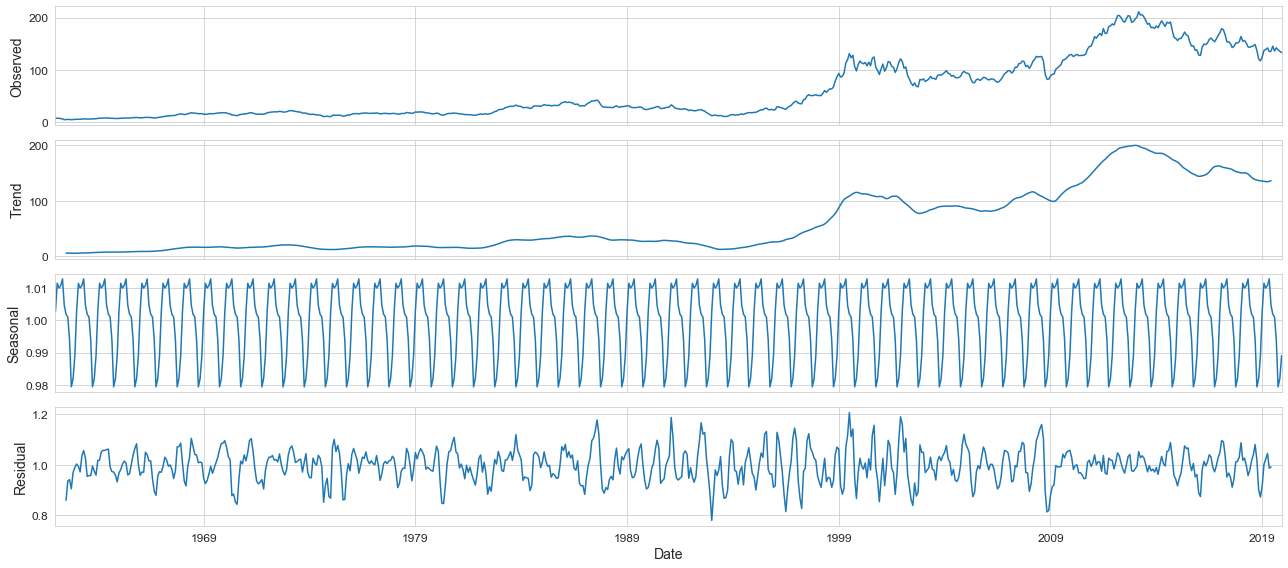

<Figure size 1296x576 with 0 Axes>

In [180]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative') 
from scipy import signal
fig = decomposition.plot()
plt.savefig('seasonal_study.png', bbox_inches = 'tight', transparent = True)
plt.show()


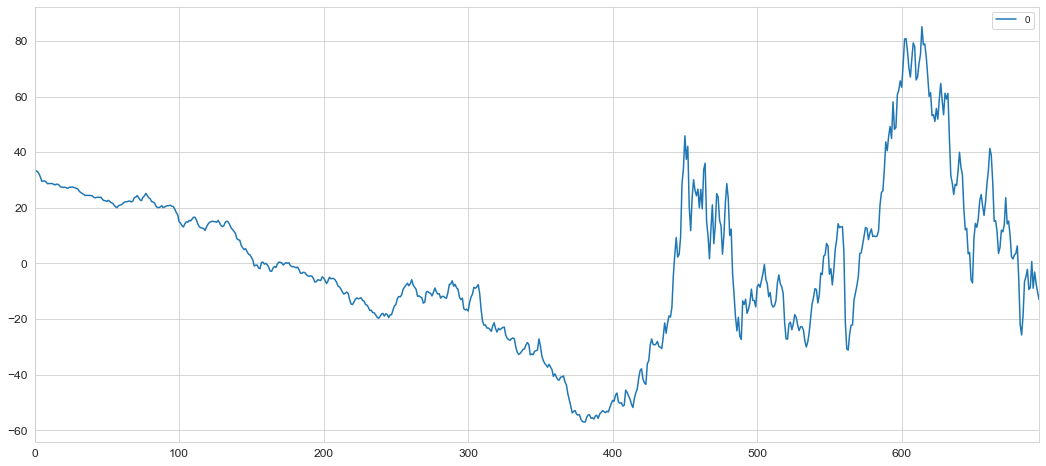

In [181]:
from scipy import signal

detrend = signal.detrend(y)
detrend2 = pd.DataFrame(detrend)
fig = detrend2.plot()
plt.show()

# Autocorrelation plot

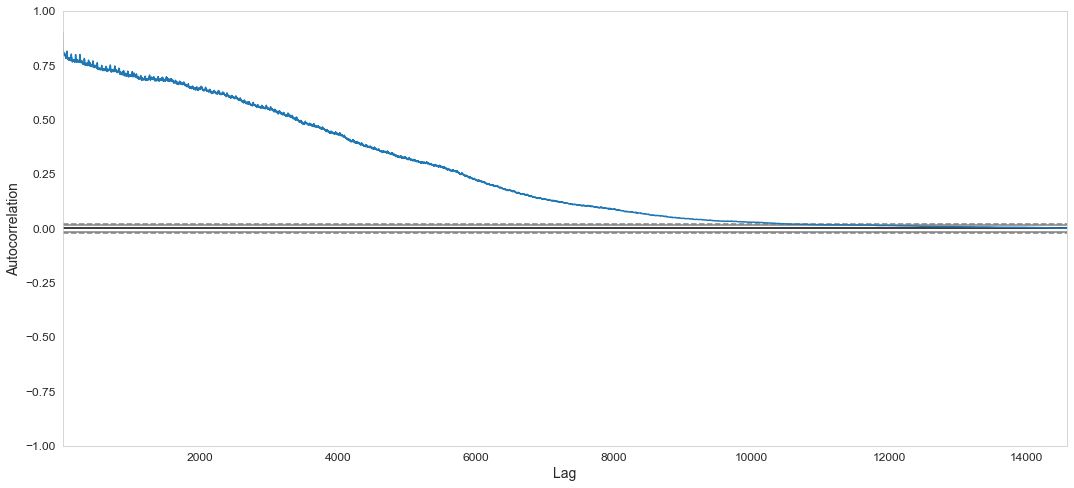

In [182]:
from pandas.plotting import autocorrelation_plot
 # probability of autocorrelation (hypothesis testing)
autocorrelation_plot(ds4)
plt.show()

In [183]:
from statsmodels.tsa.stattools import adfuller
adfuller(y, autolag = 'AIC')
# checks if time series data is stationary

(-0.7663529021845112,
 0.8288064403910107,
 8,
 687,
 {'1%': -3.439904442607456,
  '5%': -2.8657562268758907,
  '10%': -2.569015252972123},
 3849.4973371272545)

# Arima model

In [80]:
ds5 = ds4['Close']

In [81]:
ds5.head()

Date
1962-01-02    7.626667
1962-01-03    7.693333
1962-01-04    7.616667
1962-01-05    7.466667
1962-01-08    7.326667
Name: Close, dtype: float64

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                14586
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -23644.096
Method:                       css-mle   S.D. of innovations              1.224
Date:                Tue, 17 Dec 2019   AIC                          47302.192
Time:                        21:28:23   BIC                          47355.307
Sample:                             1   HQIC                         47319.839
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0086      0.010      0.906      0.365      -0.010       0.027
ar.L1.D.Close    -0.0177      0.008     -2.138      0.033      -0.034      -0.001
ar.L2.D.Close    -0.0063      0.008     

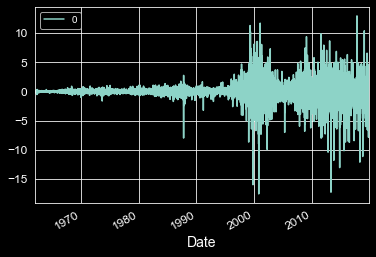

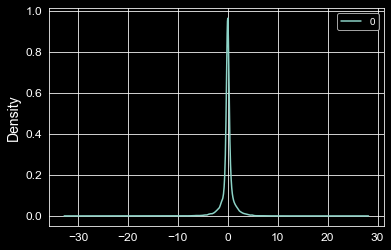

                  0
count  1.458600e+04
mean  -5.520389e-07
std    1.223981e+00
min   -1.753465e+01
25%   -2.442537e-01
50%   -7.554045e-03
75%    2.601781e-01
max    1.294861e+01


In [82]:
from statsmodels.tsa.arima_model import ARIMA
 
model = ARIMA(ds5, order=(5,1,0))
model_fit = model.fit(disp=0)

print(model_fit.summary())

# plot residual errors: residual of an observed value is 
# the difference between the observed value and the estimated value of the quantity of interest 
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

# Forecast

In [187]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
X = ds5.values
size = int(len(X) * 0.75)   # Split percentage of dataset

train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0)) # order is algorithm numbers (best 0-6)
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=122.922775, expected=124.000000
predicted=124.026271, expected=123.187500
predicted=123.278475, expected=124.562500
predicted=124.500217, expected=127.250000
predicted=127.232026, expected=125.875000
predicted=125.896513, expected=128.859375
predicted=128.761203, expected=132.000000
predicted=131.912639, expected=130.750000
predicted=130.725011, expected=134.750000
predicted=134.608903, expected=135.000000
predicted=134.850685, expected=132.375000
predicted=132.313331, expected=133.312500
predicted=133.130466, expected=131.937500
predicted=131.832839, expected=130.000000
predicted=130.120436, expected=125.375000
predicted=125.418491, expected=130.125000
predicted=130.071920, expected=127.125000
predicted=127.444702, expected=125.187500
predicted=125.444091, expected=122.000000
predicted=122.044656, expected=125.000000
predicted=124.820394, expected=123.000000
predicted=123.333538, expected=123.500000
predicted=123.627041, expected=120.062500
predicted=120.237354, expected=121

predicted=120.695613, expected=119.750000
predicted=119.653603, expected=119.687500
predicted=119.350648, expected=118.843750
predicted=118.839615, expected=119.312500
predicted=118.907584, expected=116.000000
predicted=116.212286, expected=116.812500
predicted=116.790100, expected=113.250000
predicted=113.501429, expected=120.375000
predicted=120.055826, expected=116.375000
predicted=116.905327, expected=114.500000
predicted=114.381136, expected=111.812500
predicted=112.203735, expected=111.875000
predicted=111.552797, expected=114.406250
predicted=114.596999, expected=109.750000
predicted=110.084372, expected=113.781250
predicted=113.616138, expected=114.000000
predicted=114.131118, expected=109.562500
predicted=109.633212, expected=109.500000
predicted=109.677499, expected=105.000000
predicted=105.156976, expected=101.250000
predicted=101.442927, expected=105.062500
predicted=105.157033, expected=103.312500
predicted=103.574399, expected=102.000000
predicted=102.262080, expected=104

predicted=89.332853, expected=93.510002
predicted=93.014290, expected=95.400002
predicted=95.302581, expected=99.500000
predicted=99.067889, expected=94.410004
predicted=94.807493, expected=95.040001
predicted=94.903258, expected=96.180000
predicted=96.302271, expected=94.660004
predicted=94.555522, expected=90.389999
predicted=90.835038, expected=92.000000
predicted=92.001978, expected=98.209999
predicted=97.783484, expected=97.949997
predicted=97.741931, expected=96.000000
predicted=96.118819, expected=99.050003
predicted=99.019663, expected=97.430000
predicted=97.402935, expected=96.199997
predicted=96.207269, expected=96.750000
predicted=96.916373, expected=99.699997
predicted=99.384894, expected=106.500000
predicted=105.950319, expected=114.470001
predicted=113.840302, expected=114.830002
predicted=114.596593, expected=112.000000
predicted=112.046261, expected=112.669998
predicted=112.708312, expected=114.849998
predicted=114.619450, expected=113.739998
predicted=113.677473, expec

predicted=124.684932, expected=124.489998
predicted=124.535147, expected=122.139999
predicted=122.173078, expected=120.309998
predicted=120.546501, expected=118.050003
predicted=118.275917, expected=118.849998
predicted=118.873915, expected=117.400002
predicted=117.573036, expected=119.900002
predicted=119.778193, expected=114.250000
predicted=114.673735, expected=110.500000
predicted=110.693470, expected=107.900002
predicted=108.411522, expected=108.720001
predicted=108.640766, expected=109.279999
predicted=109.396337, expected=108.150002
predicted=108.217465, expected=103.000000
predicted=103.372162, expected=105.550003
predicted=105.557140, expected=107.889999
predicted=107.848820, expected=108.000000
predicted=107.750092, expected=106.800003
predicted=106.996564, expected=106.300003
predicted=106.364765, expected=106.629997
predicted=106.621014, expected=103.910004
predicted=104.037964, expected=104.989998
predicted=105.005497, expected=107.379997
predicted=107.353863, expected=106

predicted=76.522903, expected=76.739998
predicted=76.535690, expected=78.669998
predicted=78.697290, expected=78.940002
predicted=78.909196, expected=80.400002
predicted=80.248263, expected=82.500000
predicted=82.453161, expected=81.680000
predicted=81.612178, expected=81.540001
predicted=81.569724, expected=78.949997
predicted=79.139839, expected=77.589996
predicted=77.625848, expected=77.290001
predicted=77.414472, expected=79.150002
predicted=79.020917, expected=79.349998
predicted=79.333240, expected=80.720001
predicted=80.640628, expected=80.010002
predicted=80.095553, expected=79.180000
predicted=79.162896, expected=78.370003
predicted=78.492976, expected=81.610001
predicted=81.451759, expected=84.900002
predicted=84.712470, expected=84.430000
predicted=84.298356, expected=86.199997
predicted=86.201205, expected=85.059998
predicted=85.137846, expected=87.699997
predicted=87.473295, expected=86.919998
predicted=87.022483, expected=87.300003
predicted=87.151008, expected=85.209999


predicted=82.935154, expected=82.970001
predicted=82.897624, expected=81.959999
predicted=82.039754, expected=82.500000
predicted=82.484879, expected=82.000000
predicted=82.054823, expected=81.900002
predicted=81.866696, expected=82.010002
predicted=82.075063, expected=85.760002
predicted=85.575833, expected=86.330002
predicted=86.262929, expected=87.910004
predicted=87.759069, expected=86.949997
predicted=87.093463, expected=89.099998
predicted=88.905426, expected=89.419998
predicted=89.448682, expected=87.839996
predicted=87.776807, expected=87.919998
predicted=88.048293, expected=88.699997
predicted=88.661929, expected=88.489998
predicted=88.425386, expected=90.290001
predicted=90.255301, expected=90.629997
predicted=90.628119, expected=92.000000
predicted=91.871985, expected=93.279999
predicted=93.278957, expected=91.389999
predicted=91.386687, expected=91.339996
predicted=91.388849, expected=89.400002
predicted=89.543441, expected=89.410004
predicted=89.342490, expected=89.050003


predicted=90.409653, expected=90.440002
predicted=90.412572, expected=90.059998
predicted=90.114807, expected=89.489998
predicted=89.507176, expected=90.019997
predicted=90.029208, expected=90.790001
predicted=90.757496, expected=89.989998
predicted=89.999953, expected=89.550003
predicted=89.603623, expected=88.709999
predicted=88.790822, expected=88.290001
predicted=88.288321, expected=88.150002
predicted=88.197241, expected=87.500000
predicted=87.530692, expected=87.040001
predicted=87.088461, expected=85.699997
predicted=85.792929, expected=85.349998
predicted=85.382540, expected=83.650002
predicted=83.767665, expected=83.889999
predicted=83.883912, expected=84.099998
predicted=84.161607, expected=85.250000
predicted=85.151431, expected=84.129997
predicted=84.220937, expected=84.019997
predicted=84.019742, expected=84.279999
predicted=84.339678, expected=85.300003
predicted=85.192467, expected=86.360001
predicted=86.331116, expected=85.300003
predicted=85.325839, expected=86.059998


predicted=87.641078, expected=86.199997
predicted=86.290759, expected=85.750000
predicted=85.810331, expected=84.570000
predicted=84.650943, expected=83.639999
predicted=83.685455, expected=76.699997
predicted=77.045782, expected=76.650002
predicted=76.729443, expected=75.480003
predicted=75.687853, expected=72.010002
predicted=71.937332, expected=74.029999
predicted=74.196372, expected=74.209999
predicted=74.216694, expected=74.610001
predicted=74.468045, expected=75.430000
predicted=75.557434, expected=77.050003
predicted=76.926842, expected=75.910004
predicted=75.938168, expected=76.379997
predicted=76.365499, expected=76.510002
predicted=76.563001, expected=76.470001
predicted=76.383868, expected=77.080002
predicted=77.107272, expected=75.500000
predicted=75.556749, expected=75.260002
predicted=75.276155, expected=74.980003
predicted=75.053723, expected=73.300003
predicted=73.310768, expected=73.279999
predicted=73.344537, expected=72.620003
predicted=72.682435, expected=73.160004


predicted=81.299676, expected=81.940002
predicted=81.930388, expected=81.230003
predicted=81.278042, expected=79.970001
predicted=79.993629, expected=79.510002
predicted=79.592190, expected=79.849998
predicted=79.828977, expected=80.800003
predicted=80.748679, expected=80.400002
predicted=80.422973, expected=81.330002
predicted=81.312124, expected=80.440002
predicted=80.504257, expected=81.089996
predicted=81.024415, expected=80.849998
predicted=80.919857, expected=80.910004
predicted=80.848768, expected=80.709999
predicted=80.775311, expected=80.500000
predicted=80.490325, expected=81.349998
predicted=81.338211, expected=80.199997
predicted=80.238212, expected=80.099998
predicted=80.104742, expected=80.629997
predicted=80.674249, expected=80.239998
predicted=80.195061, expected=79.900002
predicted=79.941183, expected=79.940002
predicted=79.977531, expected=79.959999
predicted=79.943991, expected=80.000000
predicted=80.002480, expected=80.290001
predicted=80.295193, expected=81.139999


predicted=93.112060, expected=93.519997
predicted=93.524409, expected=93.349998
predicted=93.334055, expected=91.449997
predicted=91.535228, expected=91.349998
predicted=91.403891, expected=91.519997
predicted=91.536365, expected=91.919998
predicted=91.849172, expected=91.250000
predicted=91.324864, expected=93.510002
predicted=93.438463, expected=94.480003
predicted=94.448752, expected=94.120003
predicted=94.059176, expected=94.230003
predicted=94.320316, expected=93.860001
predicted=93.859827, expected=93.639999
predicted=93.618921, expected=94.120003
predicted=94.131705, expected=94.769997
predicted=94.735565, expected=95.360001
predicted=95.332997, expected=95.300003
predicted=95.316707, expected=95.440002
predicted=95.443311, expected=96.000000
predicted=95.989270, expected=96.000000
predicted=95.981896, expected=95.910004
predicted=95.918928, expected=95.250000
predicted=95.300780, expected=95.660004
predicted=95.645094, expected=97.199997
predicted=97.152466, expected=96.970001


/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=98.516985, expected=99.370003
predicted=99.331341, expected=99.150002
predicted=99.134356, expected=99.000000
predicted=99.042875, expected=99.169998
predicted=99.177548, expected=100.379997
predicted=100.312155, expected=99.849998
predicted=99.864210, expected=99.540001
predicted=99.555209, expected=99.620003
predicted=99.676926, expected=98.550003
predicted=98.552974, expected=98.580002
predicted=98.600256, expected=98.290001
predicted=98.339274, expected=99.199997
predicted=99.135015, expected=98.919998
predicted=98.965046, expected=98.989998
predicted=98.971544, expected=99.349998
predicted=99.389171, expected=99.089996
predicted=99.069058, expected=98.500000
predicted=98.537966, expected=97.730003
predicted=97.790045, expected=96.910004
predicted=96.949347, expected=93.959999
predicted=94.089189, expected=92.940002
predicted=93.018564, expected=92.269997
predicted=92.354917, expected=90.900002
predicted=90.898305, expected=91.809998
predicted=91.850608, expected=93.80000

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=93.078829, expected=93.279999
predicted=93.330553, expected=94.110001
predicted=94.049775, expected=92.709999
predicted=92.720285, expected=93.760002
predicted=93.764318, expected=93.449997
predicted=93.504791, expected=93.250000
predicted=93.177828, expected=93.989998
predicted=94.053296, expected=94.500000
predicted=94.444153, expected=95.360001
predicted=95.319298, expected=95.190002
predicted=95.219463, expected=95.029999
predicted=95.029250, expected=95.000000
predicted=95.030310, expected=94.730003
predicted=94.721448, expected=94.260002
predicted=94.288191, expected=94.570000
predicted=94.578857, expected=94.260002
predicted=94.275812, expected=95.209999
predicted=95.170473, expected=96.099998
predicted=96.094069, expected=96.209999
predicted=96.169526, expected=96.519997
predicted=96.542939, expected=96.620003
predicted=96.624821, expected=96.459999
predicted=96.447311, expected=95.160004
predicted=95.225497, expected=95.669998
predicted=95.669330, expected=94.930000


predicted=104.723518, expected=106.309998
predicted=106.264552, expected=107.139999
predicted=107.050351, expected=108.839996
predicted=108.767261, expected=111.050003
predicted=111.039182, expected=111.650002
predicted=111.564806, expected=111.559998
predicted=111.559566, expected=109.599998
predicted=109.694422, expected=110.089996
predicted=110.064753, expected=108.099998
predicted=108.192702, expected=104.690002
predicted=104.767093, expected=104.900002
predicted=105.041048, expected=101.129997
predicted=101.249861, expected=100.050003
predicted=100.066179, expected=97.589996
predicted=97.849194, expected=98.309998
predicted=98.199735, expected=99.919998
predicted=99.973044, expected=97.669998
predicted=97.676136, expected=102.930000
predicted=102.828079, expected=101.830002
predicted=101.909605, expected=101.629997
predicted=101.455165, expected=101.099998
predicted=101.371546, expected=103.400002
predicted=103.160376, expected=101.220001
predicted=101.323138, expected=106.099998


predicted=119.450259, expected=114.459999
predicted=114.641664, expected=116.959999
predicted=117.026383, expected=110.129997
predicted=110.362383, expected=104.739998
predicted=104.844693, expected=103.440002
predicted=103.889715, expected=100.620003
predicted=100.549361, expected=95.650002
predicted=95.895677, expected=90.550003
predicted=90.873663, expected=89.000000
predicted=89.064962, expected=87.750000
predicted=87.751786, expected=92.209999
predicted=92.072323, expected=93.599998
predicted=93.657913, expected=88.290001
predicted=88.392328, expected=91.519997
predicted=91.617685, expected=90.779999
predicted=90.786178, expected=92.510002
predicted=92.214983, expected=88.860001
predicted=89.236175, expected=83.599998
predicted=83.670562, expected=84.349998
predicted=84.483723, expected=82.070000
predicted=82.051490, expected=79.660004
predicted=79.651214, expected=87.279999
predicted=87.231292, expected=88.199997
predicted=88.066983, expected=90.690002
predicted=90.515542, expect

predicted=115.108327, expected=116.440002
predicted=116.465442, expected=117.040001
predicted=116.951097, expected=115.570000
predicted=115.624720, expected=117.059998
predicted=116.897395, expected=117.639999
predicted=117.610181, expected=117.629997
predicted=117.571488, expected=117.279999
predicted=117.381374, expected=117.260002
predicted=117.240494, expected=117.860001
predicted=117.832496, expected=117.930000
predicted=117.924633, expected=119.919998
predicted=119.866029, expected=119.599998
predicted=119.621610, expected=118.470001
predicted=118.492371, expected=117.379997
predicted=117.485075, expected=119.330002
predicted=119.216340, expected=118.699997
predicted=118.706322, expected=117.790001
predicted=117.832577, expected=119.290001
predicted=119.340442, expected=119.580002
predicted=119.496242, expected=118.570000
predicted=118.601441, expected=116.860001
predicted=117.002536, expected=117.629997
predicted=117.592310, expected=118.570000
predicted=118.516665, expected=118

predicted=130.086579, expected=130.460007
predicted=130.452917, expected=129.000000
predicted=128.984215, expected=129.600006
predicted=129.686945, expected=128.119995
predicted=128.159700, expected=127.459999
predicted=127.454288, expected=123.919998
predicted=124.135569, expected=122.099998
predicted=122.146257, expected=126.269997
predicted=126.193385, expected=126.889999
predicted=126.797507, expected=132.679993
predicted=132.516779, expected=131.479996
predicted=131.648556, expected=131.190002
predicted=131.053070, expected=130.440002
predicted=130.596803, expected=129.949997
predicted=129.776165, expected=128.860001
predicted=128.951844, expected=123.800003
predicted=123.996257, expected=125.419998
predicted=125.419100, expected=124.449997
predicted=124.520789, expected=124.519997
predicted=124.443857, expected=123.230003
predicted=123.490273, expected=126.389999
predicted=126.213418, expected=125.260002
predicted=125.341993, expected=124.339996
predicted=124.332479, expected=127

predicted=163.945688, expected=164.820007
predicted=164.745013, expected=166.050003
predicted=166.023382, expected=164.649994
predicted=164.712065, expected=164.089996
predicted=164.126252, expected=163.850006
predicted=163.886754, expected=163.220001
predicted=163.192966, expected=162.839996
predicted=162.901553, expected=163.399994
predicted=163.408603, expected=164.240005
predicted=164.214488, expected=164.839996
predicted=164.834397, expected=161.949997
predicted=162.091878, expected=160.179993
predicted=160.269444, expected=160.770004
predicted=160.774719, expected=162.279999
predicted=162.161630, expected=161.880005
predicted=161.945431, expected=159.970001
predicted=160.113564, expected=160.160004
predicted=160.193972, expected=163.479996
predicted=163.324763, expected=161.830002
predicted=161.856911, expected=159.929993
predicted=160.062719, expected=162.279999
predicted=162.296684, expected=165.860001
predicted=165.595151, expected=162.020004
predicted=162.147534, expected=162

predicted=187.208138, expected=188.750000
predicted=188.866443, expected=186.619995
predicted=186.750752, expected=185.729996
predicted=185.571130, expected=185.240005
predicted=185.360707, expected=181.479996
predicted=181.528132, expected=181.309998
predicted=181.419881, expected=177.949997
predicted=178.188730, expected=177.059998
predicted=177.041616, expected=182.210007
predicted=182.299551, expected=180.940002
predicted=180.938783, expected=188.000000
predicted=187.780251, expected=189.449997
predicted=189.594062, expected=189.660004
predicted=189.257816, expected=190.839996
predicted=190.981201, expected=192.940002
predicted=192.618917, expected=194.050003
predicted=193.950266, expected=191.580002
predicted=191.643590, expected=194.559998
predicted=194.449617, expected=192.179993
predicted=192.268719, expected=191.149994
predicted=191.032159, expected=188.720001
predicted=189.035675, expected=187.479996
predicted=187.380325, expected=183.570007
predicted=183.839655, expected=182

predicted=197.751158, expected=195.690002
predicted=195.868091, expected=194.869995
predicted=194.914838, expected=195.080002
predicted=195.231520, expected=193.369995
predicted=193.326436, expected=194.850006
predicted=194.897783, expected=194.539993
predicted=194.639058, expected=195.039993
predicted=194.977178, expected=199.100006
predicted=199.093031, expected=199.500000
predicted=199.424191, expected=200.949997
predicted=200.870947, expected=203.270004
predicted=203.244870, expected=203.770004
predicted=203.566652, expected=206.360001
predicted=206.261051, expected=206.809998
predicted=206.777898, expected=207.149994
predicted=207.015953, expected=207.070007
predicted=207.099016, expected=206.429993
predicted=206.349592, expected=206.179993
predicted=206.189259, expected=205.979996
predicted=205.996352, expected=205.289993
predicted=205.326086, expected=204.979996
predicted=205.033835, expected=204.000000
predicted=204.066418, expected=205.910004
predicted=205.868626, expected=207

predicted=205.116731, expected=203.979996
predicted=204.142413, expected=201.199997
predicted=201.293160, expected=203.770004
predicted=203.618864, expected=202.199997
predicted=202.345119, expected=203.039993
predicted=202.991304, expected=204.869995
predicted=205.036296, expected=201.940002
predicted=201.871013, expected=197.350006
predicted=197.516298, expected=195.460007
predicted=195.563950, expected=193.539993
predicted=193.556131, expected=194.979996
predicted=195.063468, expected=194.860001
predicted=195.088372, expected=195.649994
predicted=195.677069, expected=191.110001
predicted=191.329507, expected=191.279999
predicted=191.211889, expected=191.500000
predicted=191.615535, expected=193.250000
predicted=193.121549, expected=194.929993
predicted=195.105396, expected=194.979996
predicted=194.955348, expected=191.300003
predicted=191.374748, expected=192.250000
predicted=192.194402, expected=192.800003
predicted=192.804943, expected=192.070007
predicted=192.025042, expected=194

predicted=187.930678, expected=186.669998
predicted=186.612657, expected=188.250000
predicted=188.104293, expected=195.039993
predicted=195.054782, expected=192.619995
predicted=192.531205, expected=189.830002
predicted=189.847077, expected=190.449997
predicted=190.480115, expected=192.490005
predicted=192.201070, expected=194.500000
predicted=194.538498, expected=193.550003
predicted=193.670414, expected=192.690002
predicted=192.678726, expected=191.770004
predicted=191.755331, expected=194.520004
predicted=194.400959, expected=193.289993
predicted=193.381152, expected=196.639999
predicted=196.556399, expected=195.679993
predicted=195.805968, expected=195.190002
predicted=195.027983, expected=197.770004
predicted=197.824992, expected=197.020004
predicted=196.918836, expected=196.399994
predicted=196.416371, expected=190.009995
predicted=190.221676, expected=192.270004
predicted=192.128791, expected=192.149994
predicted=192.317844, expected=191.729996
predicted=191.677842, expected=190

predicted=160.461474, expected=160.050003
predicted=160.016377, expected=160.440002
predicted=160.499351, expected=162.059998
predicted=162.016900, expected=159.509995
predicted=159.634806, expected=156.070007
predicted=156.120483, expected=155.050003
predicted=155.114398, expected=158.419998
predicted=158.350502, expected=159.110001
predicted=159.206760, expected=156.440002
predicted=156.551542, expected=156.809998
predicted=156.865618, expected=155.800003
predicted=155.765840, expected=154.570007
predicted=154.538863, expected=157.139999
predicted=157.225870, expected=156.949997
predicted=156.975126, expected=152.089996
predicted=152.162851, expected=155.389999
predicted=155.401916, expected=155.869995
predicted=155.875401, expected=156.360001
predicted=156.259144, expected=153.669998
predicted=153.942645, expected=151.550003
predicted=151.465965, expected=155.479996
predicted=155.454033, expected=153.309998
predicted=153.368068, expected=154.660004
predicted=154.639439, expected=158

predicted=152.237044, expected=152.389999
predicted=152.214159, expected=151.139999
predicted=151.165172, expected=149.619995
predicted=149.633724, expected=150.009995
predicted=149.957565, expected=150.089996
predicted=150.108282, expected=150.389999
predicted=150.423674, expected=149.220001
predicted=149.311580, expected=140.639999
predicted=140.820167, expected=140.919998
predicted=140.966848, expected=144.089996
predicted=144.140268, expected=144.679993
predicted=144.645607, expected=143.660004
predicted=143.943243, expected=137.860001
predicted=138.000515, expected=140.830002
predicted=140.723749, expected=140.550003
predicted=140.618173, expected=140.080002
predicted=140.045407, expected=140.369995
predicted=140.588132, expected=141.880005
predicted=141.764940, expected=141.630005
predicted=141.639372, expected=139.889999
predicted=139.933468, expected=138.250000
predicted=138.310931, expected=135.309998
predicted=135.368231, expected=135.470001
predicted=135.512801, expected=135

predicted=161.258802, expected=160.449997
predicted=160.490209, expected=162.070007
predicted=162.024043, expected=162.649994
predicted=162.678329, expected=162.119995
predicted=162.041560, expected=161.830002
predicted=161.881447, expected=161.369995
predicted=161.346241, expected=160.619995
predicted=160.628915, expected=161.449997
predicted=161.477246, expected=160.580002
predicted=160.622920, expected=160.669998
predicted=160.683374, expected=161.550003
predicted=161.592414, expected=163.500000
predicted=163.437541, expected=162.039993
predicted=162.082337, expected=161.770004
predicted=161.763227, expected=162.080002
predicted=162.092849, expected=163.529999
predicted=163.441994, expected=161.949997
predicted=162.026252, expected=161.880005
predicted=161.888985, expected=160.699997
predicted=160.757723, expected=160.440002
predicted=160.403514, expected=161.360001
predicted=161.434126, expected=160.039993
predicted=160.069733, expected=160.000000
predicted=160.044958, expected=160

predicted=158.884932, expected=159.100006
predicted=159.129994, expected=158.630005
predicted=158.659358, expected=159.050003
predicted=159.048782, expected=155.050003
predicted=155.188025, expected=153.029999
predicted=153.085782, expected=152.110001
predicted=152.224866, expected=151.250000
predicted=151.277457, expected=150.649994
predicted=150.819715, expected=150.369995
predicted=150.467437, expected=151.509995
predicted=151.539836, expected=153.679993
predicted=153.678380, expected=150.929993
predicted=150.978005, expected=150.779999
predicted=150.796348, expected=151.979996
predicted=151.979596, expected=152.639999
predicted=152.545240, expected=152.029999
predicted=152.125655, expected=152.509995
predicted=152.518730, expected=153.199997
predicted=153.165664, expected=152.490005
predicted=152.476001, expected=151.729996
predicted=151.773089, expected=152.630005
predicted=152.627113, expected=152.669998
predicted=152.657136, expected=152.050003
predicted=152.080287, expected=152

predicted=147.757651, expected=149.509995
predicted=149.826599, expected=151.399994
predicted=151.329554, expected=150.750000
predicted=150.752090, expected=154.759995
predicted=154.941969, expected=156.009995
predicted=155.905666, expected=156.179993
predicted=156.052622, expected=155.160004
predicted=155.210707, expected=153.960007
predicted=153.845877, expected=153.179993
predicted=153.178583, expected=155.520004
predicted=155.508862, expected=158.580002
predicted=158.569536, expected=156.550003
predicted=156.574295, expected=155.830002
predicted=155.872425, expected=153.809998
predicted=153.804818, expected=154.490005
predicted=154.395898, expected=156.949997
predicted=157.019940, expected=155.720001
predicted=155.735529, expected=158.320007
predicted=158.352071, expected=156.210007
predicted=156.225845, expected=159.309998
predicted=159.161865, expected=160.259995
predicted=160.310435, expected=159.320007
predicted=159.191642, expected=158.119995
predicted=158.236070, expected=159

predicted=121.663179, expected=120.309998
predicted=120.320929, expected=117.199997
predicted=117.291390, expected=118.570000
predicted=118.562587, expected=117.190002
predicted=117.232422, expected=119.559998
predicted=119.562576, expected=120.029999
predicted=120.137260, expected=123.000000
predicted=122.877499, expected=121.480003
predicted=121.534253, expected=124.269997
predicted=124.131382, expected=125.309998
predicted=125.291037, expected=121.599998
predicted=121.511019, expected=123.910004
predicted=123.969140, expected=119.339996
predicted=119.352019, expected=121.129997
predicted=121.074136, expected=120.889999
predicted=121.077287, expected=121.160004
predicted=121.051228, expected=120.730003
predicted=120.909230, expected=119.900002
predicted=119.860510, expected=116.099998
predicted=116.192172, expected=116.650002
predicted=116.681608, expected=116.430000
predicted=116.496247, expected=113.019997
predicted=113.096516, expected=110.940002
predicted=111.146246, expected=107

predicted=135.490452, expected=134.100006
predicted=134.079043, expected=136.320007
predicted=136.250215, expected=140.970001
predicted=140.833663, expected=140.570007
predicted=140.508642, expected=142.600006
predicted=142.586499, expected=145.050003
predicted=144.960638, expected=143.600006
predicted=143.455506, expected=143.619995
predicted=143.638351, expected=143.669998
predicted=143.639020, expected=142.479996
predicted=142.427640, expected=142.199997
predicted=142.267294, expected=142.220001
predicted=142.241173, expected=142.970001
predicted=142.962228, expected=141.880005
predicted=141.940484, expected=142.070007
predicted=142.085502, expected=141.679993
predicted=141.707713, expected=143.160004
predicted=143.115919, expected=143.550003
predicted=143.582221, expected=143.240005
predicted=143.232294, expected=145.419998
predicted=145.408190, expected=143.660004
predicted=143.646331, expected=141.690002
predicted=141.713720, expected=142.020004
predicted=142.070445, expected=142

In [222]:
# Saving model
model_fit.save('arima_model.pkl')

In [73]:
plt.style.use('dark_background')
plt.figure(figsize=(10,6))
plt.plot(test, color='red', label='Actual IBM Stock Price')
plt.plot(predictions , color='lightgreen', label='Predicted IBM Stock Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Number of days')
plt.ylabel('IBM Stock Price ($)')
plt.legend()
plt.savefig('forecast2.jpg', bbox_inches = 'tight', transparent = True)
plt.show()


NameError: name 'test' is not defined

<Figure size 720x432 with 0 Axes>

# Using trained model to forecast

# LSTM (long short-term memory)

In [382]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from keras.utils import to_categorical


In [383]:
ds_ls = ds1

In [384]:
ds_ls.dtypes

Close       float64
Volume      float64
compound    float64
neg         float64
neu         float64
pos         float64
dtype: object

In [385]:
output = ds_ls['Close'].values
inputs = ds_ls.drop('Close', axis = 1).values

In [386]:
scaler = StandardScaler()
inputs_norm = scaler.fit_transform(inputs)

In [387]:
input_train, input_test, output_train, output_test = train_test_split(inputs_norm, output, test_size = 0.2)

In [389]:
input_train = input_train.reshape((-1, 5)) # set -1 because we don't care of how nr of rows
input_test = input_test.reshape((-1, 5))

In [390]:
print('input train', input_train.shape, '\ninput_test',input_test.shape)
print('output train', output_train.shape,'\noutput_test', output_test.shape)

input train (11669, 5) 
input_test (2918, 5)
output train (11669,) 
output_test (2918,)


In [428]:
model = Sequential([
  Dense(5, activation='relu', input_shape=(5,)), 
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(1, activation='softmax'),
])

In [423]:
model.compile( 
  optimizer='adam',
  loss='mse', # loss function type (discrete categorical output)
  metrics=['accuracy'], # performance metric
)

In [425]:
history = model.fit(
  input_train, #input train data
  output_train, #output train data
  epochs=10, 
  batch_size=32,
)

Epoch 1/10
11669/11669 [==============================] - 1s 71us/step - loss: 6733.0299 - accuracy: 0.0000e+00
Epoch 2/10
11669/11669 [==============================] - 1s 87us/step - loss: 6733.0299 - accuracy: 0.0000e+00
Epoch 3/10
11669/11669 [==============================] - 1s 70us/step - loss: 6733.0299 - accuracy: 0.0000e+00
Epoch 4/10
11669/11669 [==============================] - 1s 74us/step - loss: 6733.0298 - accuracy: 0.0000e+00
Epoch 5/10
11669/11669 [==============================] - 1s 96us/step - loss: 6733.0298 - accuracy: 0.0000e+00
Epoch 6/10
11669/11669 [==============================] - 1s 84us/step - loss: 6733.0299 - accuracy: 0.0000e+00
Epoch 7/10
11669/11669 [==============================] - 1s 70us/step - loss: 6733.0298 - accuracy: 0.0000e+00
Epoch 8/10
11669/11669 [==============================] - 1s 83us/step - loss: 6733.0298 - accuracy: 0.0000e+00: 0s - loss: 6745.8420 - accuracy: 0.00
Epoch 9/10
11669/11669 [==============================] - 1s 85us

In [426]:
# Evaluate the model.
model.evaluate(input_test, output_test)

2918/2918 [==============================] - 0s 48us/step


[6722.3988277233975, 0.0]

In [ ]:
# saving model
model.save_weights('lstm_model.model')

In [ ]:
# your code here
model.load_weights('lstm.model')

predictions = model.predict(input_test[:5])
print(np.argmax(predictions, axis=1))
print(output_test[:5])

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Moving averages 

In [286]:
ds8 = ds[(ds['Date'] > '2012-01-01')]

In [287]:
ds8 = ds8.set_index('Date')

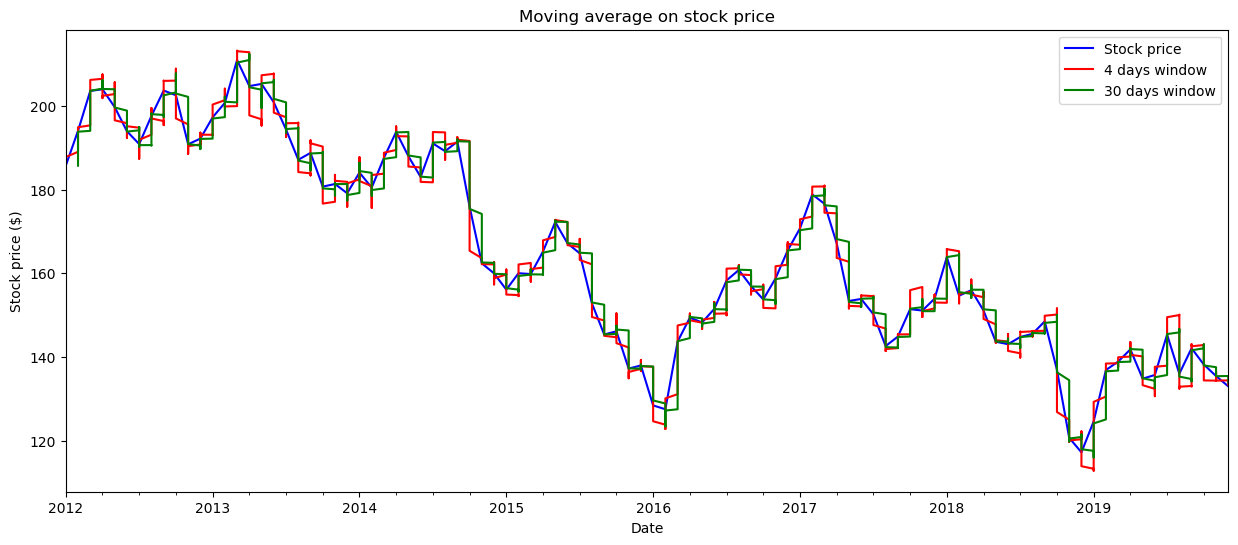

In [429]:
plt.style.use("default") 
plt.title('Moving average on stock price')
plt.xlabel('Date')
plt.ylabel('Stock price ($)')

ds8['Close'].resample('MS').mean().plot(figsize=(15, 6), color = 'blue', label = 'Stock price')
ds8['Close'].rolling(10).mean().shift().plot(figsize=(15, 6), color='red', label = '4 days window')
ds8['Close'].rolling(20).mean().shift().plot(figsize=(15, 6), color='green', label = '30 days window')

plt.legend()

plt.savefig('stock_pred_MA.jpg', bbox_inches = 'tight', transparent = True)
plt.show()

# Visualisations from KNN

In [316]:
price_pred = pd.DataFrame({'Real price': y_test, 'Predicted': y_pred})
price_pred

,Real price,Predicted
13230,195.240005,187.119995
3046,15.625000,15.047917
11312,94.230003,85.037916
5968,31.093750,37.145833
13420,170.729996,168.936666
12756,194.850006,183.043335
9708,114.750000,49.171249
4823,15.968750,16.822917
12067,126.800003,23.156250
10335,81.050003,55.178752


In [311]:
price_pred_1 = price_pred.sample(n=50, random_state=31)

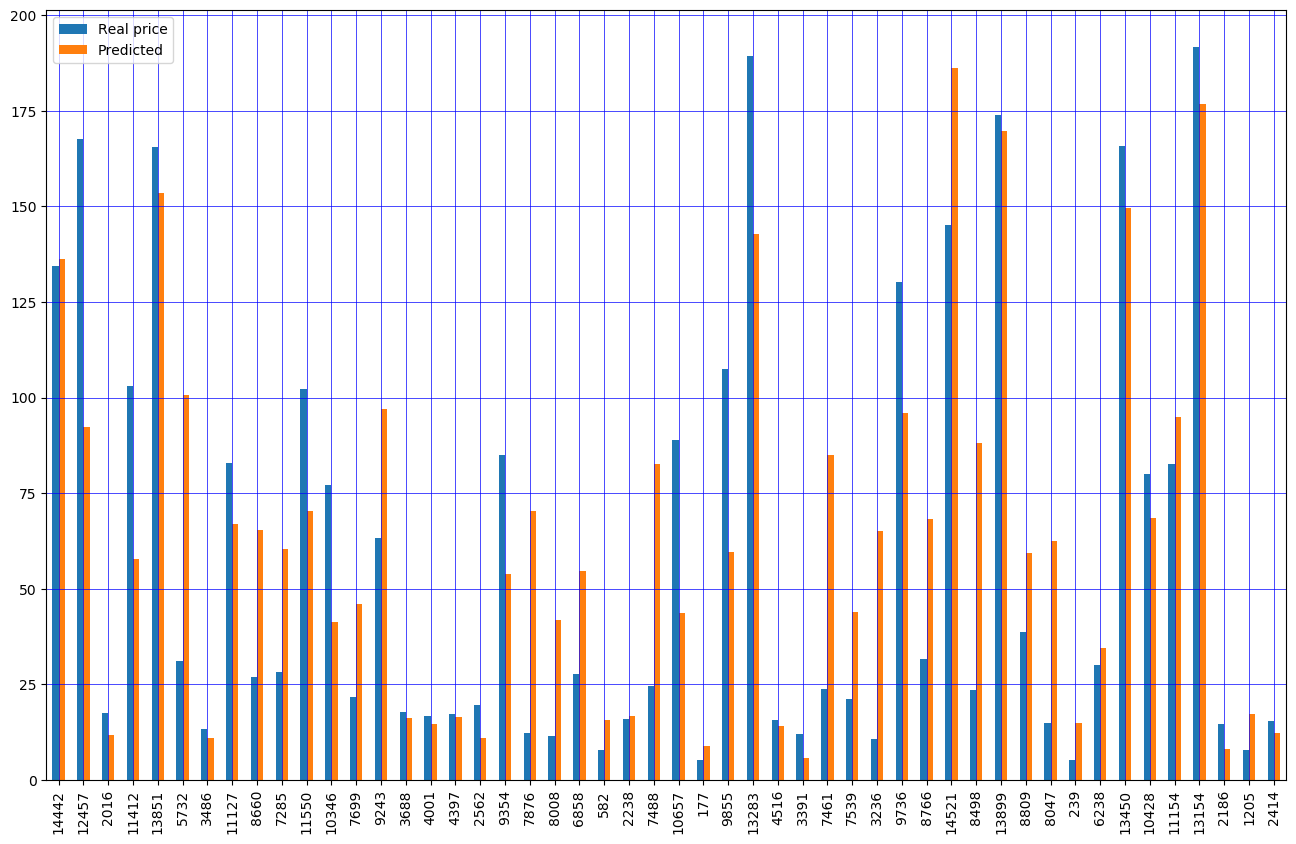

In [324]:
plt.style.use("default") 
price_pred_1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='green')
plt.show()